## Corner plots

This section shows an example for producing a corner plot from a multidimensional array containing the samples of a retrieval run. One option is to use [the corner package](https://corner.readthedocs.io), see [Foreman-Mackey (2016)](http://joss.theoj.org/papers/10.21105/joss.00024). Here we use our quickly self-written (so don't judge :) !) `nice_corner.py` package which can be found in the `petitRADTRANS` source folder, in the sub folder `retrieval_examples/analysis`. It requires [seaborn](https://seaborn.pydata.org).

We start by loading the relevant packages:

In [1]:
import numpy as np
import pylab as plt
import pickle

# nice_corner source can be found in the petitRADTRANS gitlab repository,
# requires seaborn
from nice_corner import nice_corner

Next we read the pickle files of the retrieval, in this case as produced for the transmission retrieval example (see the source in `retrieval_examples/transmission_case`, and the documentation thereof [here](ret_transmission_master.html).

In [2]:
# Paths to pickle files
samples_path = 'chain_pos.pickle'

# Load samples
f = open(samples_path,'rb')
pos = pickle.load(f)
prob = pickle.load(f)
state = pickle.load(f)
samples = pickle.load(f)
f.close()

Next, we specify some required information: what are the names of the parameters, and where do we want to save the resulting corner plot: 

In [3]:
parameter_names = {0: r"$\rm log(delta)$", \
              1: r"$\rm log(gamma)$", \
              2: r"$\rm T_{int}$", \
              3: r"$\rm T_{equ}$", \
              4: r"$\rm log(P_{tr})$", \
              5: r"$\rm alpha$", \
              6: r"$\rm log(g)$", \
              7: r"$\rm log(P_0)$", \
              8: r"$\rm CO$", \
              9: r"$\rm H_2O$", \
              10: r"$\rm CH_4$", \
              11: r"$\rm NH_3$", \
              12: r"$\rm CO_2$", \
              13: r"$\rm H_2S$", \
              14: r"$\rm Na$", \
              15: r"$\rm K$"}

output_file = 'test.pdf'

In principle we are done now, but we specify a few more optional parameters:

Only plot the last 700,000 samples, to discard the burn-in phase:

In [4]:
N_samples = 700000

If we want we can also give the ranges from where to where to plot the parameter distribution. Here we do this for the log mass fraction of the absorbers for which we only find upper limits. Otherwise the prior cut at -10 for the parameters would become visible, which does not look too nice:

In [5]:
parameter_ranges = {0: None, \
             1: None, \
             2: None, \
             3: None, \
             4: None, \
             5: None, \
             6: None, \
             7: None, \
             8: None, \
             9: None, \
             10: (-10., 0.), \
             11: (-10, 0.), \
             12: None, \
             13: (-10, 0.), \
             14: None, \
             15: None}

By not specifying ranges for most of the parameters, they will then be defined by using the 1-d parameter distribution, and plotting $\pm$ 4 standard deviations around their mean value.

We also do not want to plot all parameters: we won't plot the first 6 parameters, which are nuisance parameters, used to generate the P-T profiles. The 7th parameter contains ${\rm log}(g)$ at $P_0$, which is fixed (instead, $P_0$ is a free parameter). So we only plot from the 8th parameter on.

In [6]:
parameter_plot_indices = [7, 8, 9, 10, 11, 12, 13, 14, 15]

We also load an array that contains the input parameters, in this way we can see how well we retrieve what we put in in our synthetic observation (these values one does not have for real observations):

In [7]:
true_values = np.genfromtxt('input_params.dat')

Finally, the hex bin plots of the 2-d projections of the posterior will be normalized such that the darkest color corresponds to values equal to, or larger than, 5 times the value that is expected for a uniform distribution:

In [8]:
max_val_ratio = 5.

Let's plot!

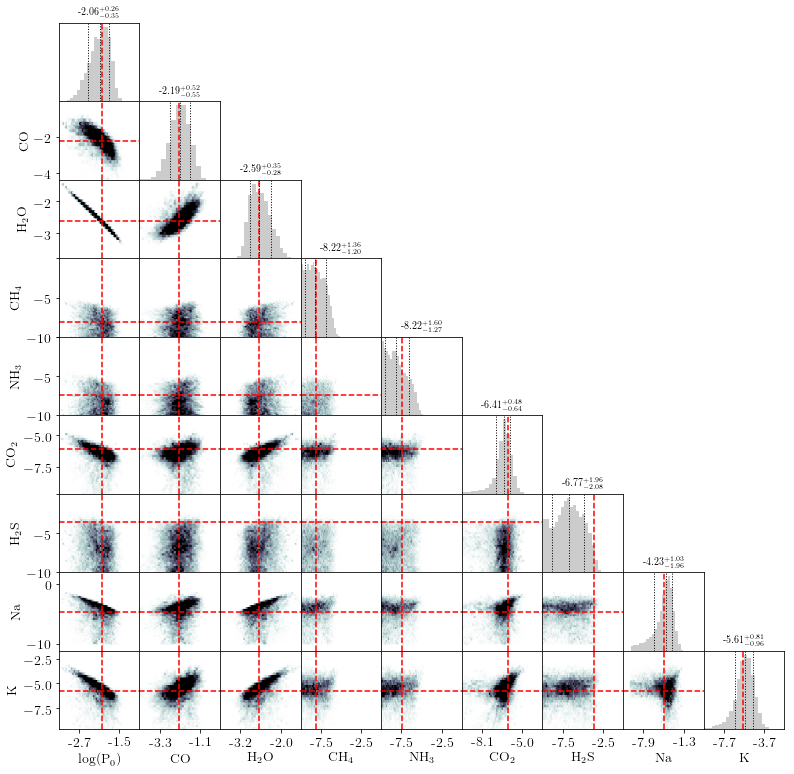

In [9]:
nice_corner(samples, \
            parameter_names, \
            output_file, \
            N_samples = N_samples, \
            parameter_plot_indices = parameter_plot_indices, \
            true_values = true_values, \
            max_val_ratio = max_val_ratio, \
            parameter_ranges = parameter_ranges)

Note that the lower log mass fraction range as defined by the priors (-10) is clearly visible in the plots where only an upper limit on the mass fraction is retrieved.